EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install japanize_matplotlib
import japanize_matplotlib
%matplotlib inline

In [2]:
train = pd.read_csv('C:\\Users\\HAMAGUCHI TAKUMA\\OneDrive - Yokohama City University\\ドキュメント\\signate\\債務不履行リスクの低減\\train.csv')
test = pd.read_csv('C:\\Users\\HAMAGUCHI TAKUMA\\OneDrive - Yokohama City University\\ドキュメント\\signate\\債務不履行リスクの低減\\test.csv')

In [3]:
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,FullyPaid
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,ChargedOff
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,FullyPaid
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,FullyPaid
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,FullyPaid


In [4]:
test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,242151,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,242152,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,242153,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,242154,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual


In [5]:
train.shape

(242150, 10)

In [6]:
test.shape

(26900, 9)

In [5]:
# 目的変数loan_statusは二値分類->不均衡データ？
train.loan_status.value_counts()

FullyPaid     199794
ChargedOff     42356
Name: loan_status, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242150 non-null  int64  
 1   loan_amnt          242150 non-null  float64
 2   term               242150 non-null  object 
 3   interest_rate      242150 non-null  float64
 4   grade              242150 non-null  object 
 5   employment_length  242150 non-null  object 
 6   purpose            242150 non-null  object 
 7   credit_score       242150 non-null  float64
 8   application_type   242150 non-null  object 
 9   loan_status        242150 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 18.5+ MB


In [7]:
# 箱ひげ図と確率密度分布を数値に直して可視化したい
train['term'].value_counts() #->不均衡データ？

3 years    189887
5 years     52263
Name: term, dtype: int64

In [8]:
train['grade'].value_counts() #->ばらつきが大きそう

C4    18936
B4    18409
C1    16767
B2    16357
B3    16058
B1    15484
B5    15163
C2    13917
C5    11420
A5    10785
D1    10464
C3    10266
D4     9828
A4     9441
D2     8823
D3     8387
D5     6866
A3     6532
A1     5764
A2     5749
E2     2835
E4     2301
E1      640
E5      535
E3      416
F5        4
F3        3
Name: grade, dtype: int64

In [9]:
# 箱ひげ図と確率密度分布を数値に直して可視化したい
train['employment_length'].value_counts()

10 years    103339
0 years      19373
9 years      18374
2 years      15783
1 year       15141
6 years      14815
4 years      13418
5 years      12812
7 years      12673
3 years      11295
8 years       5127
Name: employment_length, dtype: int64

In [10]:
train['purpose'].value_counts() #->houseが明らかに少ない

debt_consolidation    160207
credit_card            48900
other                  17633
home_improvement        7686
car                     3855
medical                 3154
small_business           449
major_purchase           262
house                      4
Name: purpose, dtype: int64

In [11]:
train['application_type'].value_counts() #->不均衡データ？

Individual    240368
Joint App       1782
Name: application_type, dtype: int64

In [12]:
train.describe()

,id,loan_amnt,interest_rate,credit_score
count,242150.00000,242150.000000,242150.000000,242150.000000
mean,121074.50000,1520.389009,13.801496,683.575024
std,69902.82818,830.250197,4.588924,29.554795
min,0.00000,323.797279,5.704849,655.424269
25%,60537.25000,761.954545,10.876086,659.531106
50%,121074.50000,1212.680586,13.543833,678.672563
75%,181611.75000,2152.213330,17.172395,698.591960
max,242149.00000,3851.867974,27.980604,808.551641


In [13]:
int_lst = ['id', 'loan_amnt', 'interest_rate', 'credit_score']

In [14]:
# 数値データがいくつかの層に分かれているので標準化は必要ないと予想
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df[['interest_rate', 'credit_score']] = scaler.fit_transform(df[['interest_rate', 'credit_score']])
# df.head()

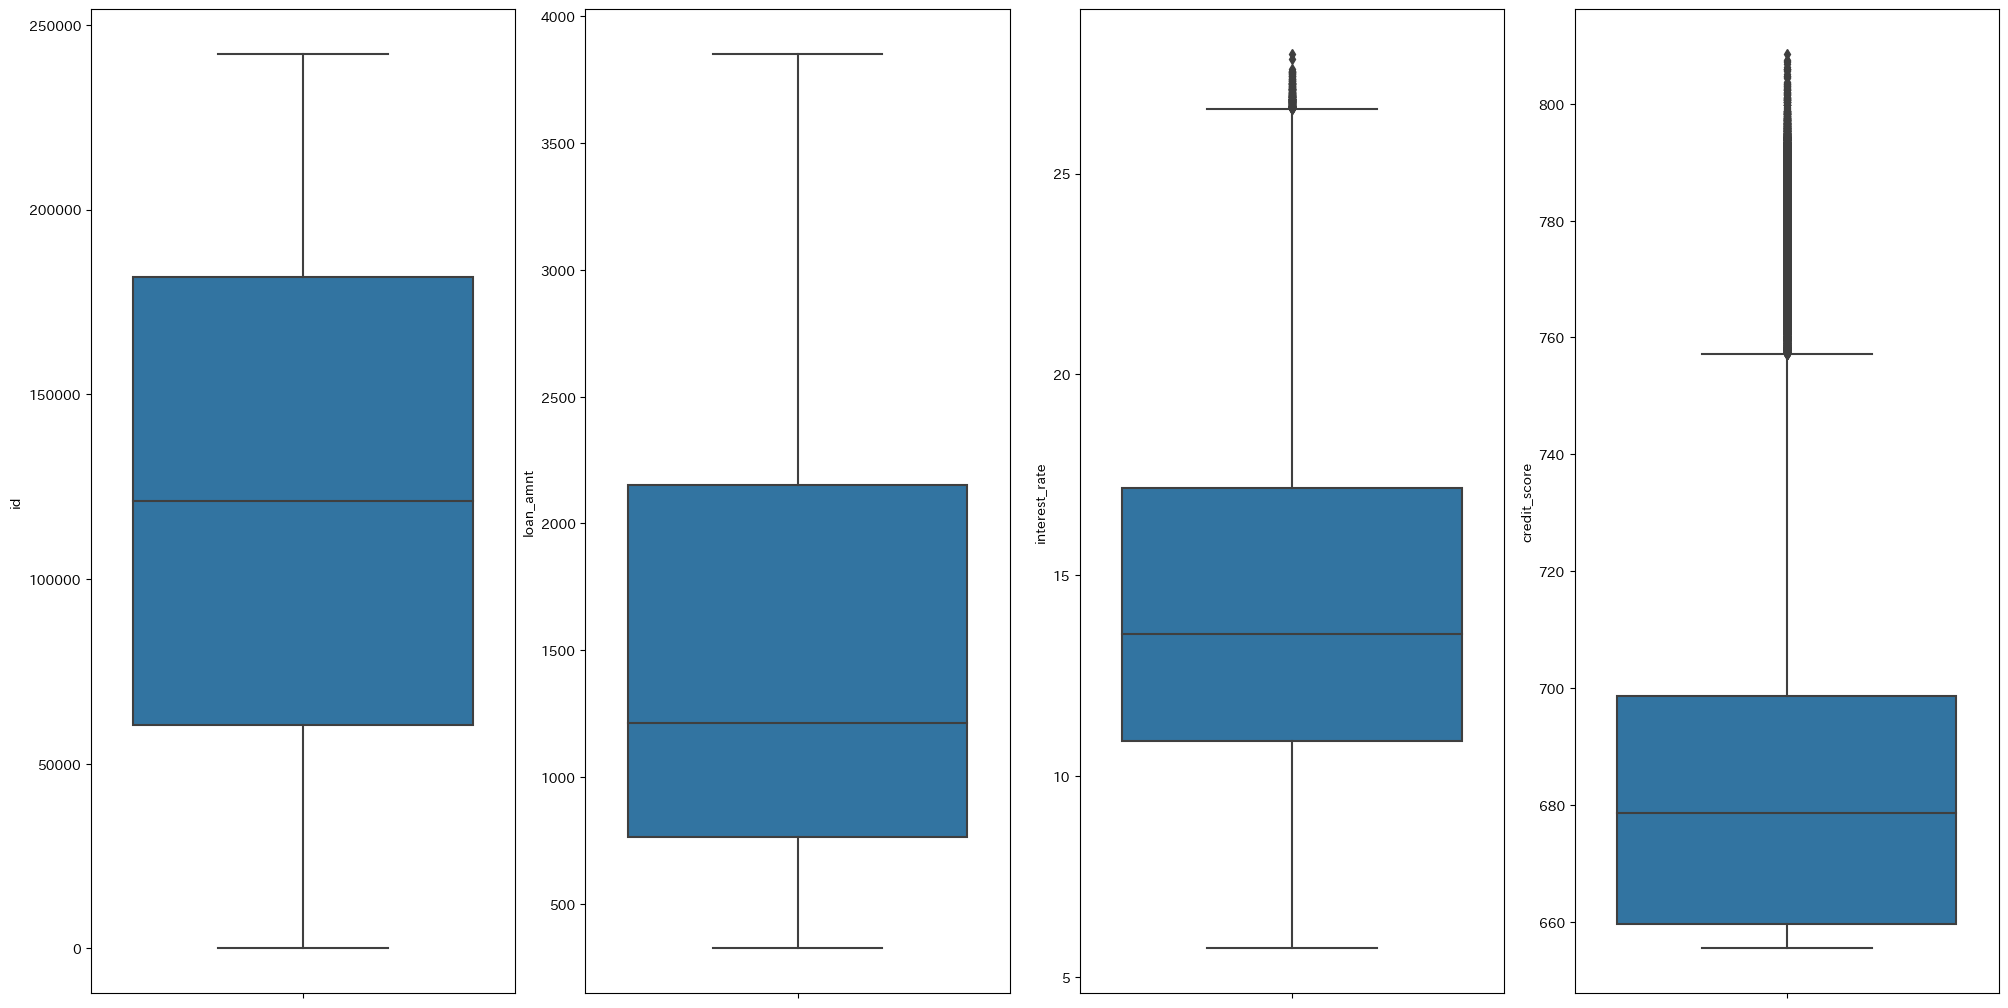

In [15]:
# interest_rate, credit_scoreには外れ値が見られるため、処置が必要そう->やっぱいらないかな
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in train[['id', 'loan_amnt', 'interest_rate', 'credit_score']].items():
    sns.boxplot(y=k, data=train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

C:\Users\HAMAGUCHI TAKUMA\AppData\Local\Temp\ipykernel_10924\3619003754.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\HAMAGUCHI TAKUMA\AppData\Local\Temp\ipykernel_10924\3619003754.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\HAM

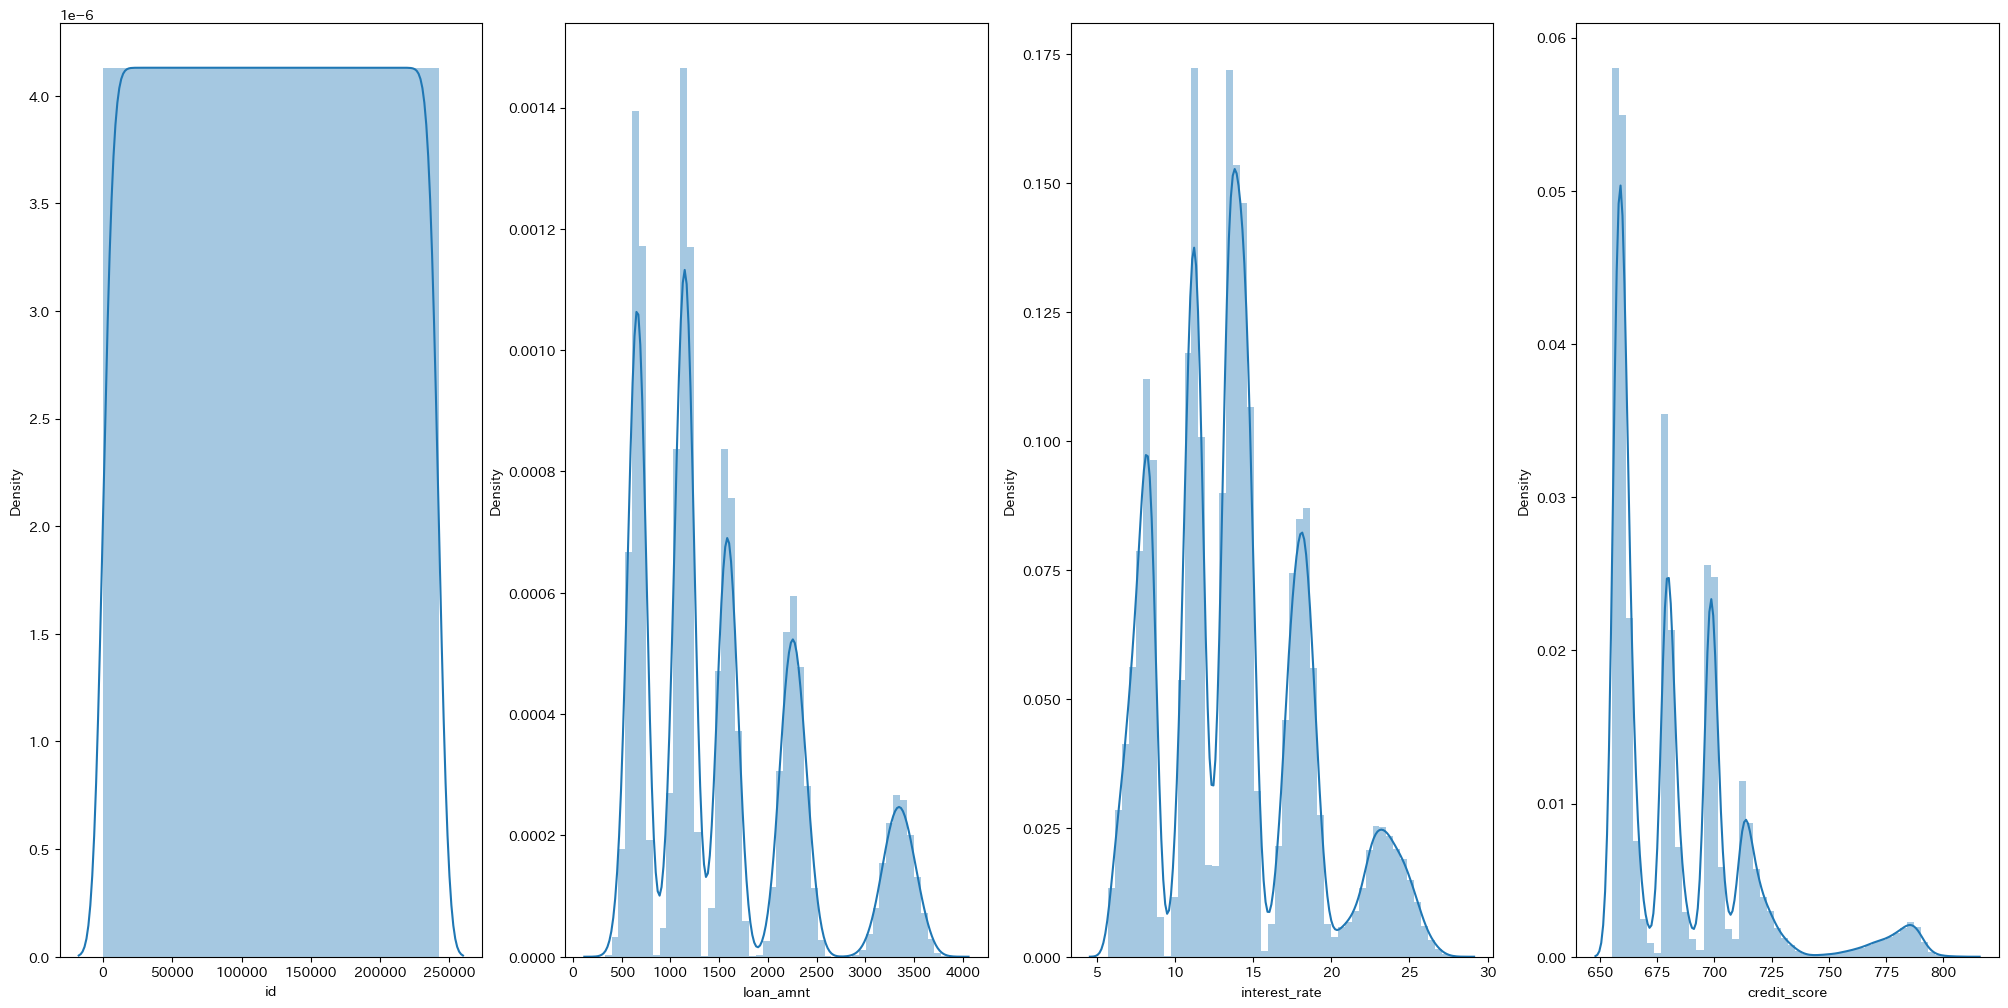

In [16]:
# 多峰性が見られるため、それぞれの峰ごとに分けた特徴量のvalueを作ったほうが良い気がする
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in train[['id', 'loan_amnt', 'interest_rate', 'credit_score']].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5);

In [17]:
train.loan_amnt.value_counts()

698.429542     3
2281.711256    2
1176.782193    2
1144.486899    2
2318.346176    2
              ..
3598.159595    1
677.277718     1
2236.483684    1
2229.439169    1
2464.766281    1
Name: loan_amnt, Length: 241705, dtype: int64

In [18]:
train.interest_rate.value_counts()

14.815612    2
14.695510    2
10.684984    2
19.050507    2
13.191068    2
            ..
11.063027    1
14.233826    1
7.197906     1
18.877091    1
17.052682    1
Name: interest_rate, Length: 241973, dtype: int64

In [19]:
train.credit_score.value_counts()

698.053781    3
657.703206    3
677.728953    3
659.533269    3
657.853951    3
             ..
659.745155    1
682.338617    1
655.972913    1
657.882617    1
658.274675    1
Name: credit_score, Length: 240708, dtype: int64

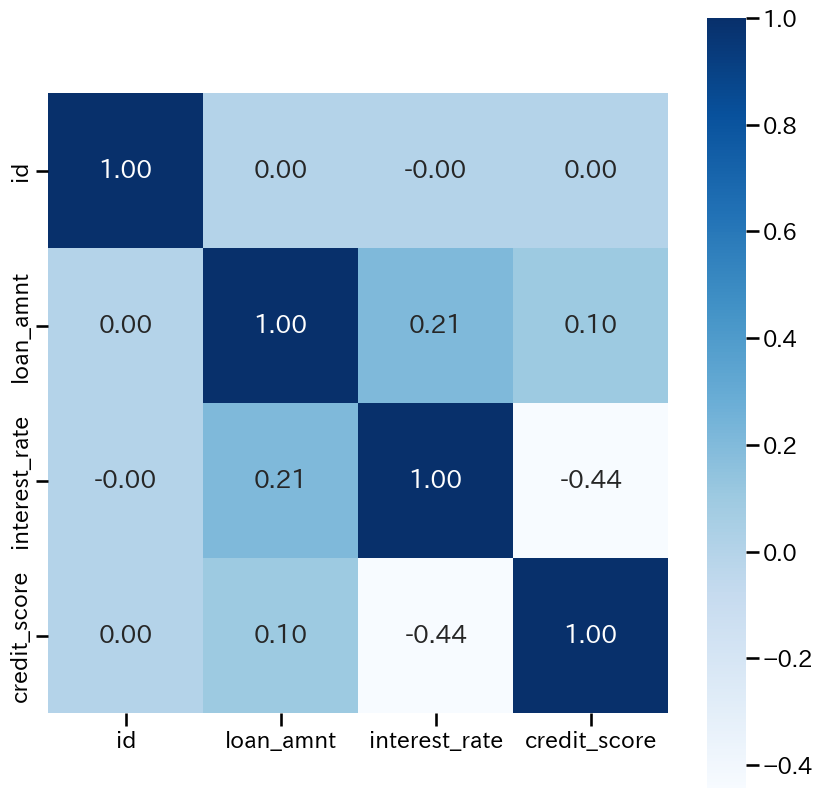

In [20]:
# 若干interest_rateとcredit_scoreで多重共線性の疑いが持たれる->一旦無視
sns.set_context("talk")
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Blues', square=True);

特徴量エンジニアリング

In [21]:
# # ラベルエンコーディング(trainのみ)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train['loan_status'] = le.fit_transform(train['loan_status'])
# train.head()

In [22]:
# for label, integer in zip(le.classes_, le.transform(le.classes_)):
#     print(f"{label} => {integer}")

In [23]:
# 目的変数の要素を数値に変換
mapping_dict = {'FullyPaid':0, 'ChargedOff':1}
train['loan_status'] = [mapping_dict[v] for v in train['loan_status']]
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,1
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,0
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0


In [24]:
df = pd.concat([train, test])
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0.0
1,1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual,1.0
2,2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0.0
3,3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual,0.0
4,4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0.0


In [25]:
# termを数値のみ取り出す
df["term"] = df["term"].str[0].astype(int)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0 years,debt_consolidation,714.061803,Individual,0.0
1,1,1183.266999,5,10.286776,B1,10 years,credit_card,697.706701,Individual,1.0
2,2,695.783256,3,14.723425,C2,1 year,debt_consolidation,656.419357,Individual,0.0
3,3,738.392546,3,14.260708,C1,0 years,credit_card,657.906852,Individual,0.0
4,4,1642.400654,5,25.217452,E5,10 years,debt_consolidation,662.972297,Individual,0.0


In [26]:
# employment_lengthを数値のみ取り出す
df["employment_length"] = df["employment_length"].str[0].astype(int)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0.0
1,1,1183.266999,5,10.286776,B1,1,credit_card,697.706701,Individual,1.0
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0.0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0.0
4,4,1642.400654,5,25.217452,E5,1,debt_consolidation,662.972297,Individual,0.0


In [27]:
# purpose列に含まれる'moving'を'other'にまとめる
df["purpose"] = df["purpose"].replace(['moving', 'other'], 'other')
df["purpose"].value_counts()

debt_consolidation    177993
credit_card            54318
other                  19609
home_improvement        8525
car                     4296
medical                 3508
small_business           508
major_purchase           288
house                      5
Name: purpose, dtype: int64

C:\Users\HAMAGUCHI TAKUMA\AppData\Local\Temp\ipykernel_10924\1447966654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\HAMAGUCHI TAKUMA\AppData\Local\Temp\ipykernel_10924\1447966654.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])


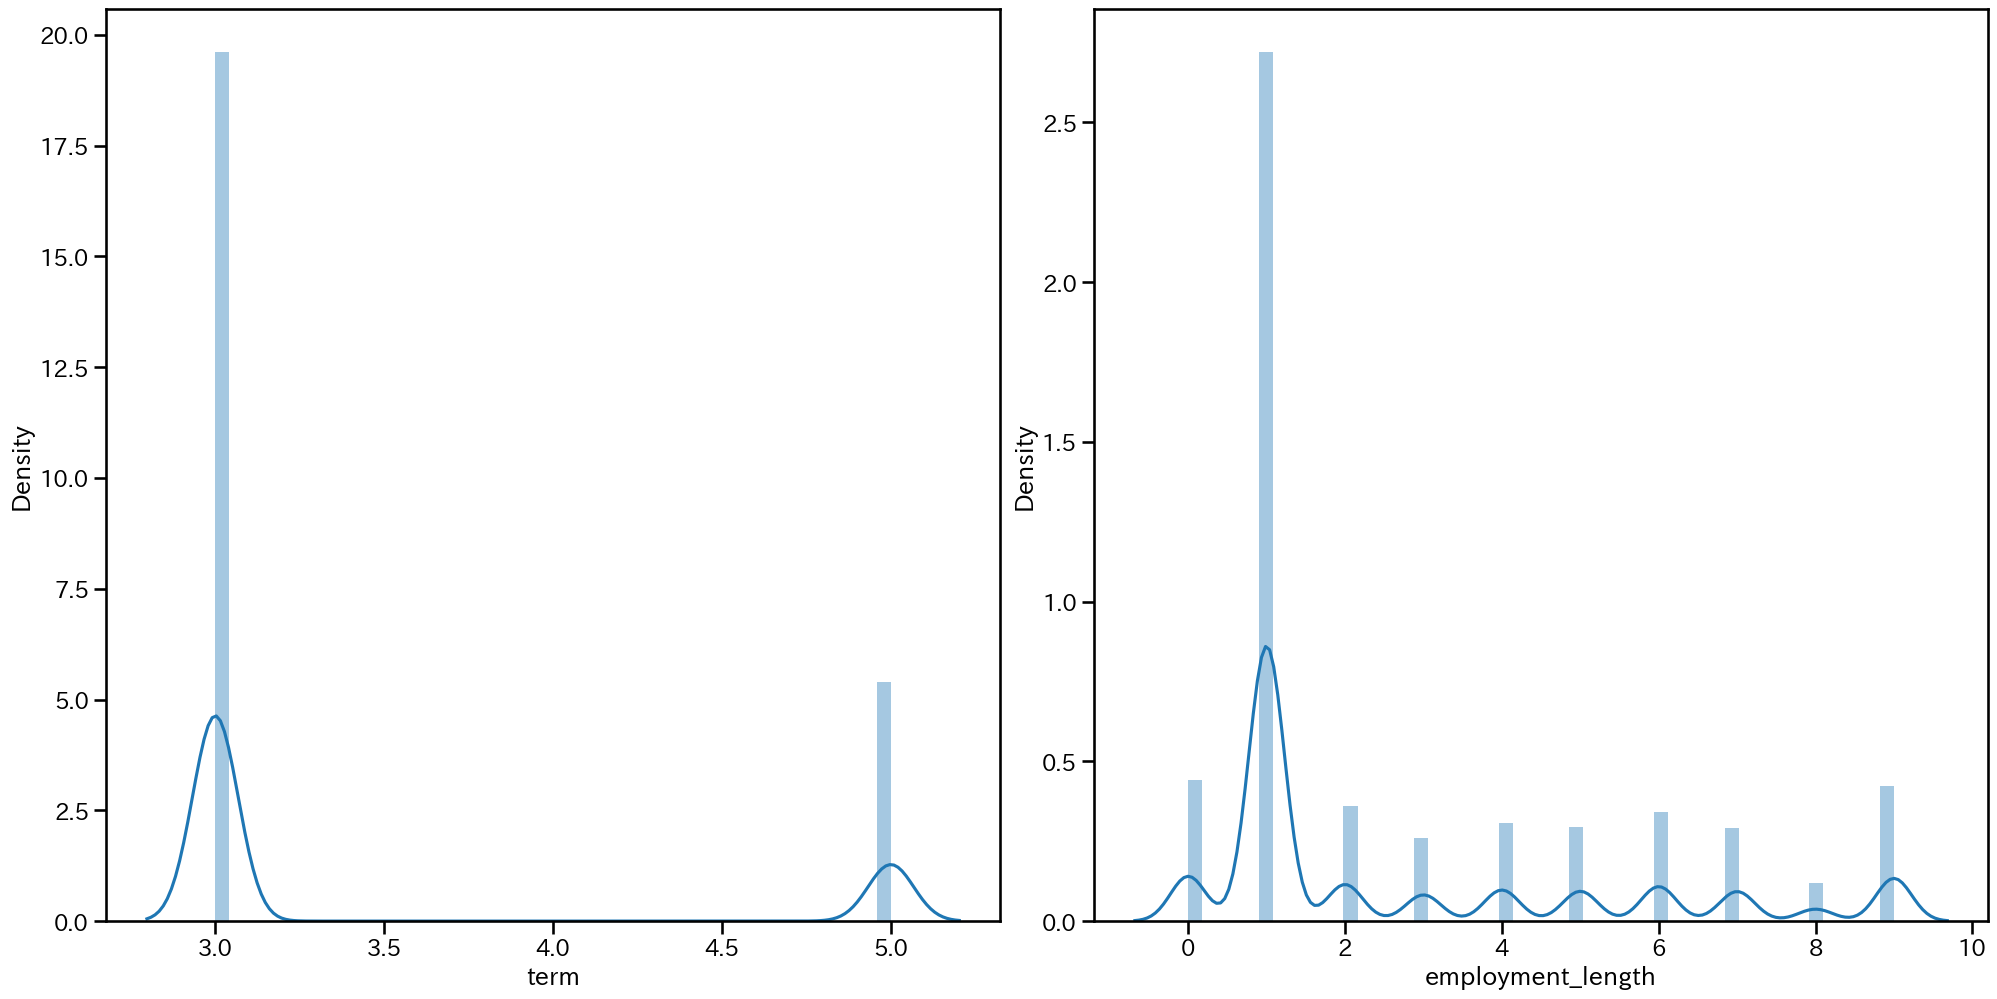

In [28]:
# 多峰性が見られるため、それぞれの峰ごとに分けた特徴量のvalueを作ったほうが良い気がする->そのままで良いと予想
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df[['term', 'employment_length']].items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5);

In [29]:
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0.0
1,1,1183.266999,5,10.286776,B1,1,credit_card,697.706701,Individual,1.0
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0.0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0.0
4,4,1642.400654,5,25.217452,E5,1,debt_consolidation,662.972297,Individual,0.0


In [30]:
# # ラベルエンコーディング('grade', 'application_type')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'].values)
# df['purpose'] = le.fit_transform(df['purpose'].values)
df['application_type'] = le.fit_transform(df['application_type'].values)
# df.head()

In [31]:
for label, integer in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} => {integer}")

Individual => 0
Joint App => 1


In [32]:
# ダミー化('purpose')
df = pd.get_dummies(df)
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,loan_status,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
0,0,609.296068,3,8.421982,4,0,714.061803,0,0.0,0,0,1,0,0,0,0,0,0
1,1,1183.266999,5,10.286776,5,1,697.706701,0,1.0,0,1,0,0,0,0,0,0,0
2,2,695.783256,3,14.723425,11,1,656.419357,0,0.0,0,0,1,0,0,0,0,0,0
3,3,738.392546,3,14.260708,10,0,657.906852,0,0.0,0,1,0,0,0,0,0,0,0
4,4,1642.400654,5,25.217452,24,1,662.972297,0,0.0,0,0,1,0,0,0,0,0,0


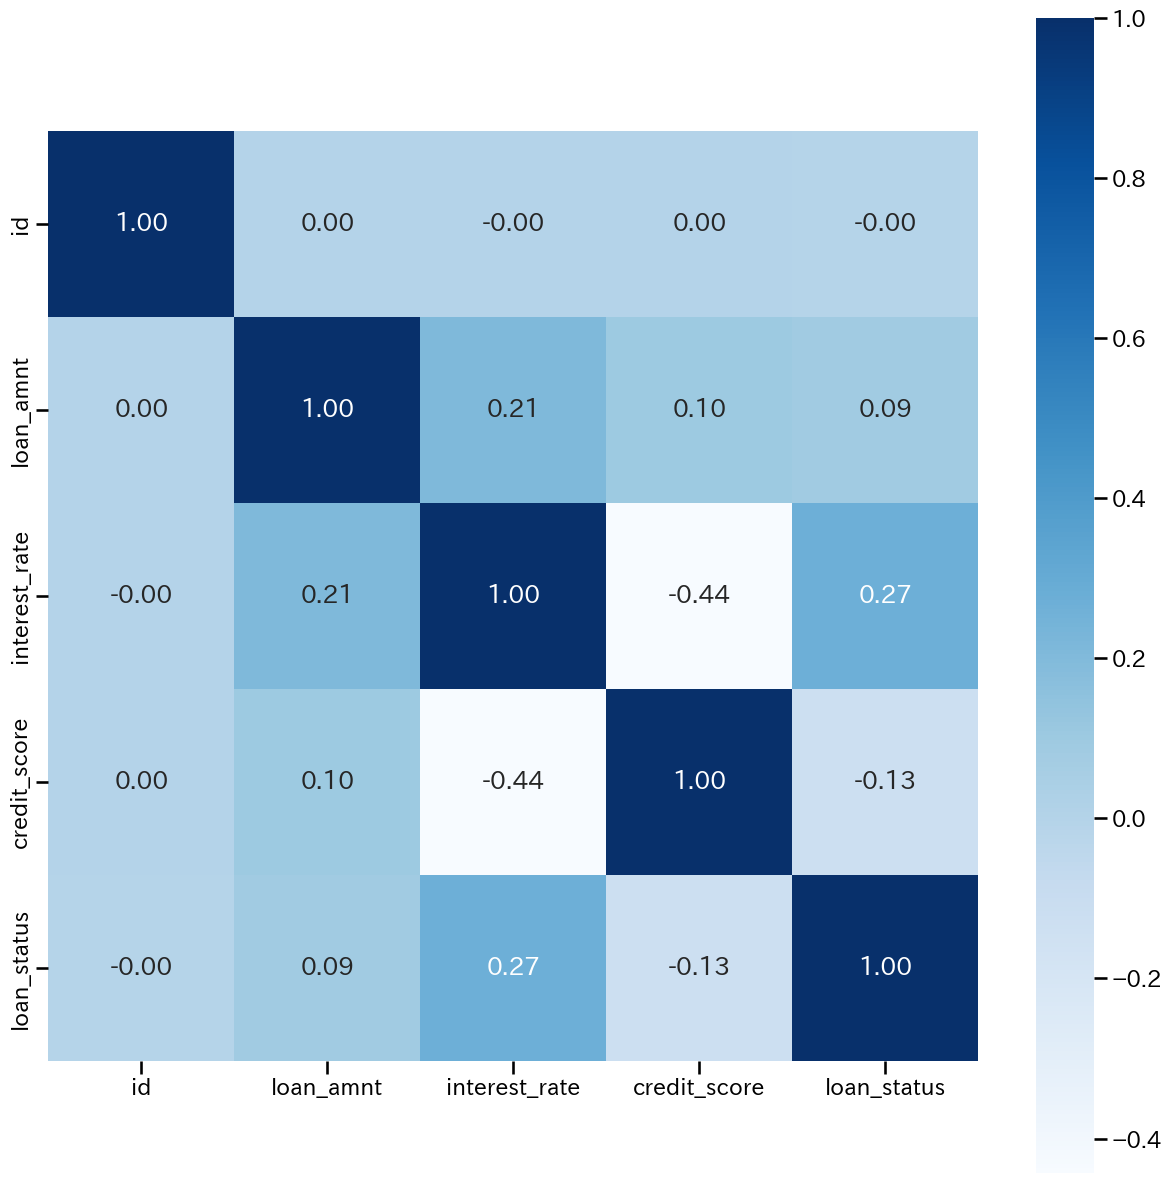

In [33]:
# 特徴量エンジニアリング後にもう一度相関を見てみる(多重共線性が疑われる特徴量がある気がする)
sns.set_context("talk")
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='Blues', square=True);

層が分かれている特徴量をクラスタリングorビン化で処理する->後で

In [34]:
# ビン化で数値データをクラス化する('loan_amnt')
def categorize_value(value):
    if value < 800:
        return 1
    elif value < 1300:
        return 2
    elif value < 1800:
        return 3
    elif value < 2800:
        return 4
    else:
        return 5
    
df['categorized_loan_amnt'] = [categorize_value(value) for value in df['loan_amnt']]
df['categorized_loan_amnt'].value_counts()

2    75924
1    69090
3    48954
4    47139
5    27943
Name: categorized_loan_amnt, dtype: int64

In [35]:
# ビン化で数値データをクラス化する('interest_rate')
def categorize_value(value):
    if value < 10:
        return 1
    elif value < 12:
        return 2
    elif value < 15:
        return 3
    elif value < 20:
        return 4
    else:
        return 5
    
df['categorized_interest_rate'] = [categorize_value(value) for value in df['interest_rate']]
df['categorized_interest_rate'].value_counts()

3    82315
2    54791
4    54267
1    52648
5    25029
Name: categorized_interest_rate, dtype: int64

In [36]:
# ビン化で数値データをクラス化する('credit_score')
def categorize_value(value):
    if value < 670:
        return 1
    elif value < 690:
        return 2
    elif value < 710:
        return 3
    elif value < 740:
        return 4
    else:
        return 5
    
df['categorized_credit_score'] = [categorize_value(value) for value in df['credit_score']]
df['categorized_credit_score'].value_counts()

1    119194
2     56672
3     49284
4     31117
5     12783
Name: categorized_credit_score, dtype: int64

In [37]:
# # categorizeする前の特徴量（'loan_amnt', 'interest_rate', 'credit_score'）は削除する
# df = df.drop(['loan_amnt', 'interest_rate', 'credit_score'], axis=1)

# df.head()

In [38]:
# # categorizeした後にもう一度分布状況を確認する
# fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
# index = 0
# axs = axs.flatten()
# for k, v in df[['categorized_loan_amnt', 'categorized_interest_rate', 'categorized_credit_score']].items():
#     sns.distplot(v, ax=axs[index])
#     index += 1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5);

In [39]:
# # クラスタリング->エラーが出るのでひとまず後で試す
# from sklearn.cluster import KMeans
# n_clusters = 5 #この数は確率密度分布の可視化から目視で確認した

# kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(df[["loan_amnt", "interest_rate", "credit_score"]])

# clusters = kmeans.predict(df[["loan_amnt", "interest_rate", "credit_score"]])

# # クラスタリング結果を表示
# for i in range(n_clusters):
#     cluster_df = df[clusters == i]
#     print(f'Cluster {i+1}: {cluster_df}')

# # クラスタリング結果をプロット
# plt.scatter(df, np.zeros_like(df), c=clusters, cmap='viridis')
# plt.xlabel('df')
# plt.show()

In [40]:
# # id列に対してtarget-encodingを適用
# from sklearn.preprocessing import TargetEncoder
# X = train['id']
# y = train['loan_status']
# encoder = TargetEncoder()
# encoder.fit(X, y)
# train['id'] = encoder.transform(X)
# test['id'] = encoder.transform(test['id'])

In [41]:
# ヒストグラムが多峰型の特徴量を外してみる


In [42]:
# dfをtrainとtestに戻す
train = df[df['id'] <= 242149]
test = df[df['id'] >= 242150]
test = test.drop('loan_status', axis=1)

In [43]:
# idをドロップする
train = train.drop('id', axis=1)
train.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,loan_status,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,categorized_loan_amnt,categorized_interest_rate,categorized_credit_score
0,609.296068,3,8.421982,4,0,714.061803,0,0.0,0,0,1,0,0,0,0,0,0,1,1,4
1,1183.266999,5,10.286776,5,1,697.706701,0,1.0,0,1,0,0,0,0,0,0,0,2,2,3
2,695.783256,3,14.723425,11,1,656.419357,0,0.0,0,0,1,0,0,0,0,0,0,1,3,1
3,738.392546,3,14.260708,10,0,657.906852,0,0.0,0,1,0,0,0,0,0,0,0,1,3,1
4,1642.400654,5,25.217452,24,1,662.972297,0,0.0,0,0,1,0,0,0,0,0,0,3,5,1


In [44]:
# idをドロップする
test = test.drop('id', axis=1)
test.head()

,loan_amnt,term,interest_rate,grade,employment_length,credit_score,application_type,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,categorized_loan_amnt,categorized_interest_rate,categorized_credit_score
0,1161.830205,3,13.105362,10,1,682.016083,0,0,1,0,0,0,0,0,0,0,2,3,2
1,2257.465815,5,14.196200,14,1,668.240313,0,0,0,1,0,0,0,0,0,0,4,3,1
2,2182.137002,3,8.307772,4,1,703.277694,0,0,1,0,0,0,0,0,0,0,4,1,3
3,520.284912,3,6.956504,1,7,731.138779,0,0,0,1,0,0,0,0,0,0,1,1,4
4,2303.349549,3,11.658497,7,6,698.368991,0,0,0,1,0,0,0,0,0,0,4,2,3


vif統計量を計算して多重共線性を判断してみる

In [45]:
# X = train.iloc[:, 0:-1]
# y = train['loan_status']

# X

In [46]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns

# print(vif)

多重共線性が疑われる特徴量を削除してみる(基準：vif 100 以上)

In [47]:
# train = train.drop(['credit_score'], axis=1)
# train.head()

In [48]:
# test = test.drop(['credit_score'], axis=1)
# test.head()

In [49]:
# # K-fold target encoding->今回は使用しない
# from sklearn import base
# from sklearn.model_selection import KFold

# class KFoldTargetEncoderTrain(base.BaseEstimator,
#                             base.TransformerMixin):
#     """How to use.
#     targetc = KFoldTargetEncoderTrain('Feature','Target',n_fold=10)
#     new_train = targetc.fit_transform(train)
#     """
#     def __init__(self,colnames,targetName,
#                 n_fold=10, verbosity=True,
#                 discardOriginal_col=False):
#         self.colnames = colnames
#         self.targetName = targetName
#         self.n_fold = n_fold
#         self.verbosity = verbosity
#         self.discardOriginal_col = discardOriginal_col

#     def fit(self, X, y=None):
#         return self

#     def transform(self,X):        
#         assert(type(self.targetName) == str)
#         assert(type(self.colnames) == str)
#         assert(self.colnames in X.columns)
#         assert(self.targetName in X.columns)       

#         mean_of_target = X[self.targetName].mean()
#         kf = KFold(n_splits = self.n_fold,
#                     shuffle = True, random_state=2019)        
#         col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
#         X[col_mean_name] = np.nan       

#         for tr_ind, val_ind in kf.split(X):
#             X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
#             X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
#             X[col_mean_name].fillna(mean_of_target, inplace = True)  # nanになってしまったところは平均値で埋める --(1)

#         if self.verbosity:            
#             encoded_feature = X[col_mean_name].values
#             print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName, 
#                                                                                 np.corrcoef(X[self.targetName].values,encoded_feature)[0][1]))
#         if self.discardOriginal_col:
#             X = X.drop(self.targetName, axis=1)
#         return X


# class TargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
#     """How to use.
#     test_targetc = TargetEncoderTest(new_train,
#                                     'Feature',
#                                     'Feature_Kfold_Target_Enc')
#     new_test = test_targetc.fit_transform(test)
#     """

#     def __init__(self,train,colNames,encodedName):

#         self.train = train
#         self.colNames = colNames
#         self.encodedName = encodedName

#     def fit(self, X, y=None):
#         return self

#     def transform(self,X):       
#         mean =  self.train[[self.colNames, self.encodedName]].groupby(self.colNames).mean().reset_index() 

#         dd = {}
#         for index, row in mean.iterrows():
#             dd[row[self.colNames]] = row[self.encodedName]
#             X[self.encodedName] = X[self.colNames]
#         X = X.replace({self.encodedName: dd})
#         return X


In [50]:
# # idをtarget encoding
# targetc = KFoldTargetEncoderTrain('id', 'loan_status', n_fold=5)
# train = targetc.fit_transform(train)

# test_targetc = TargetEncoderTest(train, 'id', 'id_Kfold_Target_Enc')
# test = test_targetc.fit_transform(test)


In [51]:
# # gradeをtarget encoding
# targetc = KFoldTargetEncoderTrain('grade', 'loan_status', n_fold=10)
# train = targetc.fit_transform(train)

# test_targetc = TargetEncoderTest(train, 'grade', 'grade_Kfold_Target_Enc')
# test = test_targetc.fit_transform(test)


In [52]:
# # purposeをtarget encoding
# targetc = KFoldTargetEncoderTrain('purpose', 'loan_status', n_fold=10)
# train = targetc.fit_transform(train)

# test_targetc = TargetEncoderTest(train, 'purpose', 'purpose_Kfold_Target_Enc')
# test = test_targetc.fit_transform(test)

In [53]:
# # application typeをtarget encoding
# targetc = KFoldTargetEncoderTrain('application_type', 'loan_status', n_fold=10)
# train = targetc.fit_transform(train)

# test_targetc = TargetEncoderTest(train, 'application_type', 'application_type_Kfold_Target_Enc')
# test = test_targetc.fit_transform(test)

In [54]:
# # train = train.drop('grade', axis=1)
# train = train.drop('purpose', axis=1)
# # train = train.drop('application_type', axis=1)
# train.head()

In [55]:
# # test = test.drop('grade', axis=1)
# test = test.drop('purpose', axis=1)
# # test = test.drop('application_type', axis=1)
# test.head()

モデルを用いた分析

In [56]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import lightgbm as lgb

In [57]:
# データ量がそこそこ多いのでhold-out法よりもk-foldの方が精度が良いと予想
print(len(train))

242150


In [58]:
# hold-out法でバリデーション
X = train.drop('loan_status', axis=1)
y = train['loan_status']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

chatgptによると、F1スコアは分類モデルの性能を評価する際に、特にクラスの不均衡がある場合に有用な指標です。モデルの適合率（Precision）と再現率（Recall）のバランスを示す指標であり、モデルの性能をより包括的に評価できます。

In [59]:
# models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), MLPClassifier()]

# for model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_valid)
#     f1 = f1_score(y_valid, y_pred)
#     print(f"F1 Score: {f1}")
#     # report = classification_report(y_test, y_pred, target_names=train.target_names)
#     # print(f"{model.__class__.__name__} Accuracy: {report}")

In [60]:
# # ロジスティック回帰
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# f1 = f1_score(y_valid, y_pred)
# print(f"{model} F1_score: {f1}")

In [61]:
# model = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=21, min_samples_leaf=13)
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_valid)
# y_pred = pd.DataFrame(y_pred)
# y_pred = y_pred[1]
# print(y_pred)
# y_pred = np.where(y_pred > 0.18, 1, 0)
# f1 = f1_score(y_valid, y_pred)
# print(f1)

In [62]:
# # ランダムフォレスト（閾値を動かしてみる）
# f1_lst = []
# num = np.arange(0.15, 0.20, 0.001)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# for i in num:
#     y_pred = model.predict_proba(X_valid)
#     y_pred = pd.DataFrame(y_pred)
#     y_pred = y_pred[1]
#     y_pred = np.where(y_pred > i, 1, 0)
#     f1 = f1_score(y_valid, y_pred)
#     f1_lst.append(f1)

In [63]:
# # 学習
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

In [64]:
# y_pred = model.predict_proba(X_valid)
# y_pred = pd.DataFrame(y_pred)
# y_pred = y_pred[1]
# y_pred = np.where(y_pred > 0.18, 1, 0)
# f1 = f1_score(y_valid, y_pred)
# print(f1)

In [65]:
# # numの番目が閾値として最適っぽい
# print(f1_lst.index(max(f1_lst)))
# print(num[30])

In [66]:
# print(max(f1_lst))

In [67]:
# plt.figure(figsize=(10, 6))
# plt.plot(num, f1_lst, label='精度の推移', marker='o')

In [68]:
# # 今度はtrainデータ全体で学習させてみる
# idx = f1_lst.index(max(f1_lst))
# threshold = num[idx]
# model.fit(X, y)
# test_preds = model.predict_proba(test)
# test_preds = pd.DataFrame(test_preds)
# test_preds = test_preds[1]
# test_preds = np.where(test_preds > threshold, 1, 0)
# test_preds

In [69]:
# # 1になる確率を算出できた
# test_preds = pd.DataFrame(test_preds)
# test_preds = test_preds[1]
# test_preds

In [70]:
# # 決定木
# f1_lst = []
# for i in range(30):
#     model = DecisionTreeClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_valid)
#     f1 = f1_score(y_valid, y_pred)
#     f1_lst.append(f1)
# print(f"{model} F1_score: {np.average(f1_lst)}")

In [71]:
# # 決定木（optunaでチューニング）
# !pip install optuna
# import optuna

# def objective(trial):
#     # ハイパーパラメータの探索範囲を指定
#     max_depth = trial.suggest_int('max_depth', 2, 100)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
#     # 決定木を構築
#     model = DecisionTreeClassifier(
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         criterion = criterion,
#         random_state=42
#     )
    
#     # モデルを訓練
#     model.fit(X_train, y_train)
    
#     # テストデータでF1スコアを計算
#     y_pred = model.predict_proba(X_valid)
#     y_pred = pd.DataFrame(y_pred)
#     y_pred = y_pred[1]
#     y_pred = np.where(y_pred > 0.18, 1, 0)
#     f1 = f1_score(y_valid, y_pred)

#     return f1

# study = optuna.create_study(direction='maximize')  # 最大化問題として設定
# study.optimize(objective, n_trials=200)  # 200回試行

# # 最適なハイパーパラメータを表示
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # 最適な評価指標値（F1スコア）を表示
# best_f1 = study.best_value
# print("Best F1 Score:", best_f1)

# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']
# best_criterion = best_params['criterion']

# best_model = DecisionTreeClassifier(
#     max_depth=best_max_depth,
#     min_samples_split=best_min_samples_split,
#     min_samples_leaf=best_min_samples_leaf,
#     criterion=best_criterion,
#     random_state=42
# )

# best_model.fit(X_train, y_train)
# y_pred = best_model.predict_proba(X_valid)
# y_pred = pd.DataFrame(y_pred)
# y_pred = y_pred[1]
# print(y_pred)
# y_pred = np.where(y_pred > 0.18, 1, 0)

# # 最適なモデルのF1スコアを表示
# best_f1_score = f1_score(y_valid, y_pred)
# print("Best Model F1 Score:", best_f1_score)



In [72]:
# # ランダムフォレスト（optunaでチューニング）
# !pip install optuna
# import optuna

# def objective(trial):
#     # ハイパーパラメータの探索範囲を指定
#     max_depth = trial.suggest_int('max_depth', 2, 100)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
#     # ランダムフォレストモデルを構築
#     model = RandomForestClassifier(
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         criterion = criterion,
#         random_state=42
#     )
    
#     # モデルを訓練
#     model.fit(X_train, y_train)
    
#     # テストデータでF1スコアを計算
#     y_pred = model.predict_proba(X_valid)
#     y_pred = pd.DataFrame(y_pred)
#     y_pred = y_pred[1]
#     y_pred = np.where(y_pred > 0.18, 1, 0)
#     f1 = f1_score(y_valid, y_pred)

#     return f1

# study = optuna.create_study(direction='maximize')  # 最大化問題として設定
# study.optimize(objective, n_trials=200)  # 200回試行

# # 最適なハイパーパラメータを表示
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # 最適な評価指標値（F1スコア）を表示
# best_f1 = study.best_value
# print("Best F1 Score:", best_f1)

# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']
# best_criterion = best_params['criterion']

# best_model = RandomForestClassifier(
#     max_depth=best_max_depth,
#     min_samples_split=best_min_samples_split,
#     min_samples_leaf=best_min_samples_leaf,
#     criterion=best_criterion,
#     random_state=42
# )

# best_model.fit(X_train, y_train)
# y_pred = best_model.predict_proba(X_valid)
# y_pred = pd.DataFrame(y_pred)
# y_pred = y_pred[1]
# print(y_pred)
# y_pred = np.where(y_pred > 0.18, 1, 0)

# # 最適なモデルのF1スコアを表示
# best_f1_score = f1_score(y_valid, y_pred)
# print("Best Model F1 Score:", best_f1_score)



In [73]:
# # 今度はtrainデータ全体で学習させてみる
# best_model.fit(X, y)
# test_preds = best_model.predict_proba(test)
# test_preds = pd.DataFrame(test_preds)
# test_preds = test_preds[1]
# test_preds = np.where(test_preds > 0.18, 1, 0)
# test_preds

In [74]:
# # 学習モデルの保存
# import pickle

# with open('best_model_randomforest.pickle', mode='wb') as f:
#     pickle.dump(best_model, f)

In [75]:
# # 今度はtrainデータ全体で学習させてみる
# best_model.fit(X, y)
# test_preds = best_model.predict(test)
# test_preds = test_preds.astype(int)
# test_preds

In [76]:
# # 決定木
# f1_lst = []
# for i in range(30):
#     model = DecisionTreeClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_valid)
#     f1 = f1_score(y_valid, y_pred)
#     f1_lst.append(f1)
# print(f"{model} F1_score: {np.average(f1_lst)}")

In [77]:
# # 今度はtrainデータ全体で学習させてみる
# model.fit(X, y)
# test_preds = model.predict(test)
# test_preds

In [78]:
# print(model.get_params())

In [79]:
# # 決定木（k分割交差検証）
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# SEED = 42 # シード値
# FOLDS = 10 # 分割数K
# valid_scores = []
# y_test_preds = pd.DataFrame()

# kf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# for fold, (train_indices, valid_indices) in tqdm(enumerate(kf.split(X, y)), total=FOLDS):
#     X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
#     y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

#     model = DecisionTreeClassifier()
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_valid)
#     f1 = f1_score(y_valid, y_pred)
#     test_preds = model.predict(test)
#     test_preds = test_preds.astype(int)
#     y_test_preds[f'{fold+1}'] = test_preds
#     valid_scores.append(f1)
#     print(f"{model} F1_score: {f1}")

# # 交差検証のスコア（CVスコア）
# cv_score = np.mean(valid_scores)
# print(f'CV: {np.mean(cv_score)}')

In [80]:
# y_test_preds

In [81]:
# test_preds = list(y_test_preds.mean(axis=1).astype(int))
# test_preds

In [82]:
# # 決定木（グリッドサーチでチューニング）->時間がかかりすぎたため精度は不明
# max_score = 0
# SearchMethod = 0
# DTC_grid = {DecisionTreeClassifier(): {"criterion": ["entropy"],
#                                         "splitter": ["best"],
#                                         "max_depth": [2, 5, 10, 15, None],
#                                         "min_samples_split": [2, 5, 10, None],
#                                         "min_samples_leaf": [1, 5, 10, None],
#                                         # "random_state": [i for i in range(0, 101)]
#                                         }}
# for model, param in tqdm(DTC_grid.items()):
#     clf = GridSearchCV(model, param)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_valid)
#     score = f1_score(y_valid, y_pred)

#     if max_score < score:
#         max_score = score
#         best_param = clf.best_params_
#         best_model = model.__class__.__name__

# print("ベストスコア:{}".format(max_score))
# print("モデル:{}".format(best_model))
# print("パラメーター:{}".format(best_param))


In [83]:
# # 決定木（ベイズ最適化でチューニング）->F1_score: 0.20682389172542348
# !pip install scikit-optimize
# from sklearn.model_selection import cross_val_score

# def objective_function(params):
#     max_depth = params[0]
#     min_samples_split = params[1]
#     min_samples_leaf = params[2]

#     model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
#     # 交差検証を使用してモデルの性能を評価
#     scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
#     # スコアの平均を返す（最小化する目的関数なので、1からスコアを引いた値を返します）
#     return 1 - scores.mean()

# from skopt.space import Integer

# param_space = [Integer(1, 20, name='max_depth'),
#                 Integer(2, 20, name='min_samples_split'),
#                 Integer(1, 10, name='min_samples_leaf')]

# from skopt import gp_minimize

# result = gp_minimize(objective_function, param_space, n_calls=30, random_state=0)

# best_params = result.x
# best_objective_value = result.fun

In [84]:
# print(best_params)
# print(best_objective_value)

In [85]:
# # 決定木（optunaでチューニング）
# !pip install optuna
# import optuna

# def objective(trial):
#     # ハイパーパラメータの探索範囲を指定
#     max_depth = trial.suggest_int('max_depth', 2, 32)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
#     # 決定木モデルを構築
#     model = DecisionTreeClassifier(
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42
#     )
    
#     # モデルを訓練
#     model.fit(X_train, y_train)
    
#     # テストデータでF1スコアを計算
#     y_pred = model.predict(X_valid)
#     f1 = f1_score(y_valid, y_pred)

#     return f1

# study = optuna.create_study(direction='maximize')  # 最大化問題として設定
# study.optimize(objective, n_trials=100)  # 100回試行

# # 最適なハイパーパラメータを表示
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # 最適な評価指標値（F1スコア）を表示
# best_f1 = study.best_value
# print("Best F1 Score:", best_f1)

# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']

# best_model = DecisionTreeClassifier(
#     max_depth=best_max_depth,
#     min_samples_split=best_min_samples_split,
#     min_samples_leaf=best_min_samples_leaf,
#     random_state=42
# )

# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_valid)

# # 最適なモデルのF1スコアを表示
# best_f1_score = f1_score(y_valid, y_pred)
# print("Best Model F1 Score:", best_f1_score)



In [86]:
# # サポートベクトルマシン->スケーリングが必要なので処理に時間がかかっている
# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# f1 = f1_score(y_valid, y_pred)
# print(f"{model} F1_score: {f1}")

In [87]:
# # MLP
# model = MLPClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# f1 = f1_score(y_valid, y_pred)
# print(f"{model} F1_score: {f1}")

In [88]:
# # データ保存
# import pickle
# pickle.dump(model, open('lightgbm.pickle', 'wb'))

In [89]:
# lightgbm(optunaによるハイパーパラメータチューニング)
from optuna.integration import lightgbm as gbm

train_data = gbm.Dataset(X_train, label=y_train)
valid_data = gbm.Dataset(X_valid, label=y_valid, reference=train_data)

# 固定するパラメータ
params = {
    'objective':'binary',
    # 'metric':'binary_error',
    'boosting_type':'gbdt',
    # 'num_leaves':31,
    # 'learning_rate':0.05,　　#
    # iterations(木の数)を増やすなら小さな学習率(learning_rate)をとると良いらしい
    # 'feature_fraction':0.9
}

model = gbm.train(params, train_data, valid_sets=[valid_data])

best_params = model.params
print("Best params:", best_params)

y_pred = model.predict(X_valid, num_iteration=model.best_iteration)
y_pred = np.where(y_pred > 0.20, 1, 0)
f1 = f1_score(y_valid, y_pred)
print(f"{model} F1_score: {f1}")

In [90]:
# LightGBMのパラメータの設定
SEED = 42 # シード値
FOLDS = 10 # 分割数K

params = {
        'objective':'binary',
        'metric':'f1',
        'boosting_type':'gbdt',
        'learning_rate':0.09,
        'feature_pre_filter': False, 
        'lambda_l1': 9.82026004722772, 
        'lambda_l2': 1.0661176582519656e-08, 
        'num_leaves': 10, 
        'feature_fraction': 0.4, 
        'bagging_fraction': 0.8735129139493859, 
        'bagging_freq': 5, 
        'min_child_samples': 20, 
        'num_iterations': 1000
        
    }

In [91]:
# lightgbm(k分割交差検証)
from sklearn.model_selection import KFold

# 予測値を格納する変数
y_test_preds = pd.DataFrame()

# 結果などを格納する変数
valid_scores, results, models = [], [], []

# 交差検証法で学習
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
for fold, (train_indices, valid_indices) in tqdm(enumerate(kf.split(X, y)), total=FOLDS):
    X_train, X_valid = X.iloc[train_indices], X.iloc[valid_indices]
    y_train, y_valid = y.iloc[train_indices], y.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    # 学習
    result = {}
    model = lgb.train(
        params = params,
        train_set = lgb_train, # 学習データ
        valid_sets = [lgb_train, lgb_valid], # 検証データ
        valid_names = ['Train', 'Valid'], # 学習経過で表示する名称
        callbacks=[
            lgb.callback.record_evaluation(result), # ログの記録
        ]
    )

    # 検証データのスコア
    y_valid_pred = model.predict(X_valid)
    y_valid_pred = np.where(y_valid_pred > 0.20, 1, 0)
    score = f1_score(y_valid, y_valid_pred)
    valid_scores.append(score)
    print(f'FOLD: {fold+1} f1_score: {score}')

    # テストデータの推論
    y_test_preds[f'{fold+1}'] = model.predict(test)
    

    # 結果を保存
    results.append(result)
    models.append(model)

# 交差検証のスコア（CVスコア）
cv_score = np.mean(valid_scores)
print(f'CV: {np.mean(cv_score)}')



  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37644, number of negative: 177600
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174890 -> initscore=-1.551360
[LightGBM] [Info] Start training from score -1.551360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

 11%|█         | 1/9 [00:11<01:33, 11.69s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37634, number of negative: 177610
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 215244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174843 -> initscore=-1.551682
[LightGBM] [Info] Start training from score -1.551682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 22%|██▏       | 2/9 [00:18<01:00,  8.58s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37692, number of negative: 177552
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175113 -> initscore=-1.549816
[LightGBM] [Info] Start training from score -1.549816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

 33%|███▎      | 3/9 [00:25<00:47,  7.87s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37752, number of negative: 177492
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175392 -> initscore=-1.547887
[LightGBM] [Info] Start training from score -1.547887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 44%|████▍     | 4/9 [00:33<00:39,  7.97s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37691, number of negative: 177553
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 215244, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175108 -> initscore=-1.549848
[LightGBM] [Info] Start training from score -1.549848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 56%|█████▌    | 5/9 [00:40<00:30,  7.70s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37598, number of negative: 177647
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 215245, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174675 -> initscore=-1.552848
[LightGBM] [Info] Start training from score -1.552848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 67%|██████▋   | 6/9 [00:45<00:20,  6.93s/it]

FOLD: 6 f1_score: 0.40189297415362213


c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37628, number of negative: 177617
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215245, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174815 -> initscore=-1.551881
[LightGBM] [Info] Start training from score -1.551881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 78%|███████▊  | 7/9 [00:51<00:13,  6.60s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37496, number of negative: 177749
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 215245, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174201 -> initscore=-1.556138
[LightGBM] [Info] Start training from score -1.556138
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

 89%|████████▉ | 8/9 [00:57<00:06,  6.28s/it]c:\Users\HAMAGUCHI TAKUMA\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 37713, number of negative: 177532
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 843
[LightGBM] [Info] Number of data points in the train set: 215245, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.175210 -> initscore=-1.549146
[LightGBM] [Info] Start training from score -1.549146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

100%|██████████| 9/9 [01:07<00:00,  7.55s/it]

CV: 0.3972940464991299


In [92]:
test_preds = y_test_preds.mean(axis=1)
test_preds = np.where(test_preds > 0.20, 1, 0)
test_preds

array([0, 1, 0, ..., 0, 0, 0])

In [93]:
# lightgbm
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
params = {
        'objective':'binary',
        # 'metric':'f1',
        'boosting_type':'gbdt',
        'learning_rate':0.09,
        'feature_pre_filter': False, 
        'lambda_l1': 9.82026004722772, 
        'lambda_l2': 1.0661176582519656e-08, 
        'num_leaves': 10, 
        'feature_fraction': 0.4, 
        'bagging_fraction': 0.8735129139493859, 
        'bagging_freq': 5, 
        'min_child_samples': 20, 
        'num_iterations': 1000
        
    }

model = lgb.train(params, train_data, valid_sets=[test_data])
y_preds = model.predict(X_valid, num_iteration=model.best_iteration)
y_preds = np.where(y_preds > 0.20, 1, 0)
f1 = f1_score(y_valid, y_preds)
print(f1)

In [94]:
# # データの保存
# # 学習モデルの保存
# import pickle

# with open('optuna_lightgbm.pickle', mode='wb') as f:
#     pickle.dump(model, f)

In [95]:
# # データ読み込み
# model_gbm = pickle.load(open('lightgbm.pickle', 'rb'))
# y_pred = model_gbm.predict(X_valid)
# y_pred = np.where(y_pred > 0.20, 1, 0)
# print(f1_score(y_valid, y_pred))

In [96]:
# # lightgbm（閾値を動かしてみる）
# f1_lst = []
# num = np.arange(0.15, 0.23, 0.01)
# for i in num:
#     y_pred = model.predict(X_valid)
#     y_pred = np.where(y_pred > i, 1, 0)
#     f1 = f1_score(y_valid, y_pred)
#     f1_lst.append(f1)

In [97]:
# print("Best params:", best_params)
# print(f"{model} F1_score: {f1}")

In [98]:
# # lightgbm（optunaで最適なハイパーパラメータを求めた上で学習率[learning_rate]を動かしてみる）->0.09
# f1_lst = []
# learning_rate = np.arange(0.01, 0.16, 0.01)
# for rate in learning_rate:
#     train_data = lgb.Dataset(X_train, label=y_train)
#     test_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)
#     params = {
#         'objective':'binary',
#         # 'metric':'f1',
#         'boosting_type':'gbdt',
#         'learning_rate':rate,
#         'feature_pre_filter': False, 
#         'lambda_l1': 9.82026004722772, 
#         'lambda_l2': 1.0661176582519656e-08, 
#         'num_leaves': 10, 
#         'feature_fraction': 0.4, 
#         'bagging_fraction': 0.8735129139493859, 
#         'bagging_freq': 5, 
#         'min_child_samples': 20, 
#         'num_iterations': 1000
        
#     }

#     model = lgb.train(params, train_data, valid_sets=[test_data])
#     y_preds = model.predict(X_valid, num_iteration=model.best_iteration)
#     y_preds = np.where(y_preds > 0.20, 1, 0)
#     f1 = f1_score(y_valid, y_preds)
#     f1_lst.append(f1)

In [99]:
# # 閾値の変動による精度の変化を可視化
# plt.figure(figsize=(10, 6))
# plt.plot(num, f1_lst, label='精度の推移', marker='o')

In [100]:
# # 学習率の変動による精度の変化
# plt.figure(figsize=(10, 6))
# plt.plot(learning_rate, f1_lst, label='精度の推移', marker='o')

In [101]:
# print(f1_lst.index(max(f1_lst)))
# print(learning_rate[8])
# print(max(f1_lst))

In [102]:
# # 今度はtrainデータ全体で学習させてみる
# train_data = lgb.Dataset(X, label=y)
# test_data = lgb.Dataset(test, reference=train_data)
# params = {
#         'objective':'binary',
#         'metric':'f1',
#         'boosting_type':'gbdt',
#         'learning_rate':0.09,
#         'feature_pre_filter': False, 
#         'lambda_l1': 9.82026004722772, 
#         'lambda_l2': 1.0661176582519656e-08, 
#         'num_leaves': 10, 
#         'feature_fraction': 0.4, 
#         'bagging_fraction': 0.8735129139493859, 
#         'bagging_freq': 5, 
#         'min_child_samples': 20, 
#         'num_iterations': 1000
        
#     }

# model = lgb.train(params, train_data)
# test_preds = model.predict(test, num_iteration=model.best_iteration)
# test_preds = np.where(test_preds > 0.20, 1, 0)
# print(test_preds)

In [103]:
# test_preds = best_model.predict(test)
# test_preds = test_preds.astype(int)
# test_preds

提出

In [104]:
submit = pd.read_csv('C:\\Users\\HAMAGUCHI TAKUMA\\OneDrive - Yokohama City University\\ドキュメント\\signate\\債務不履行リスクの低減\\submit.csv', header=None)
submit.head()

,0,1
0,242150,0
1,242151,0
2,242152,0
3,242153,0
4,242154,0


In [105]:
submit[1] = test_preds
submit.head()

,0,1
0,242150,0
1,242151,1
2,242152,0
3,242153,0
4,242154,0


In [106]:
submit.to_csv("submission.csv", index=False, header=None)

In [107]:
submission = pd.read_csv('submission.csv', header=None)
submission.head()

,0,1
0,242150,0
1,242151,1
2,242152,0
3,242153,0
4,242154,0
